<h1>Deepfake Detection</h1>


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import glob2
import os, fnmatch
from pathlib import Path
# import mtcnn
from mtcnn.mtcnn import MTCNN

In [18]:
import cv2
import os

def extract_multiple_videos(input_filename, image_output_folder):
    """Extract frames from a video file and save them as images."""
    os.makedirs(image_output_folder, exist_ok=True)

    cap = cv2.VideoCapture(input_filename)
    if not cap.isOpened():
        print("❌ Error opening video file:", input_filename)
        return

    i = 1
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        image_path = os.path.join(image_output_folder, f"{i}.jpg")
        cv2.imwrite(image_path, frame)
        i += 1

    cap.release()
    print(f"✅ Extracted {i-1} frames to: {image_output_folder}")


In [12]:
from google.colab import files

uploaded = files.upload()


Saving fake.mp4 to fake.mp4
Saving real.mp4 to real.mp4


In [19]:
extract_multiple_videos(fake_video_name, fake_image_path_for_frame)
extract_multiple_videos(real_video_name, real_image_path_for_frame)

✅ Extracted 297 frames to: /content/fake_frames
✅ Extracted 297 frames to: /content/real_frames


In [20]:
# Define the paths to your uploaded video files and output directories
fake_video_name = "/content/fake.mp4"  # Uploaded fake video
fake_image_path_for_frame = "/content/fake_frames"  # Folder to save fake video frames

real_video_name = "/content/real.mp4"  # Uploaded real video
real_image_path_for_frame = "/content/real_frames"  # Folder to save real video frames


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def mse(imageA, imageB):
    """Compute the Mean Squared Error between two images."""
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err  # Lower = more similar

def compare_images(imageA, imageB, title="Image Comparison"):
    """Display and compare two images using MSE and SSIM."""
    # Resize if needed
    if imageA.shape != imageB.shape:
        print("Resizing images to match dimensions...")
        import cv2
        imageB = cv2.resize(imageB, (imageA.shape[1], imageA.shape[0]))

    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)

    fig = plt.figure(title, figsize=(10, 4))
    plt.suptitle(f"MSE: {m:.2f}, SSIM: {s:.2f}", fontsize=14)

    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap=plt.cm.gray)
    plt.title("Image A")
    plt.axis("off")

    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap=plt.cm.gray)
    plt.title("Image B")
    plt.axis("off")

    plt.show()


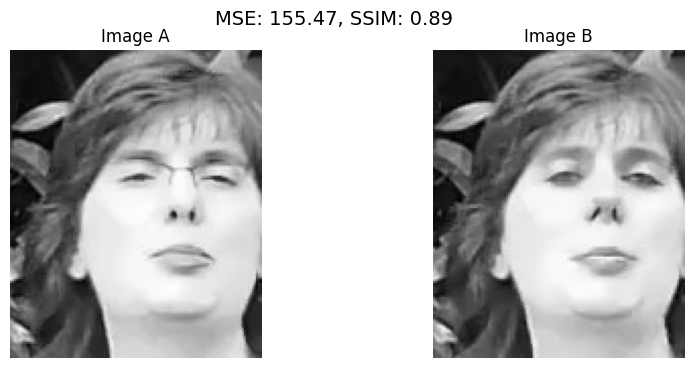

In [22]:
import cv2

# Load two sample frames
img1 = cv2.imread('/content/real_frames/1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/fake_frames/1.jpg', cv2.IMREAD_GRAYSCALE)

compare_images(img1, img2, title="Real vs Fake Frame")
